Plot saved to: plots/d_full.png


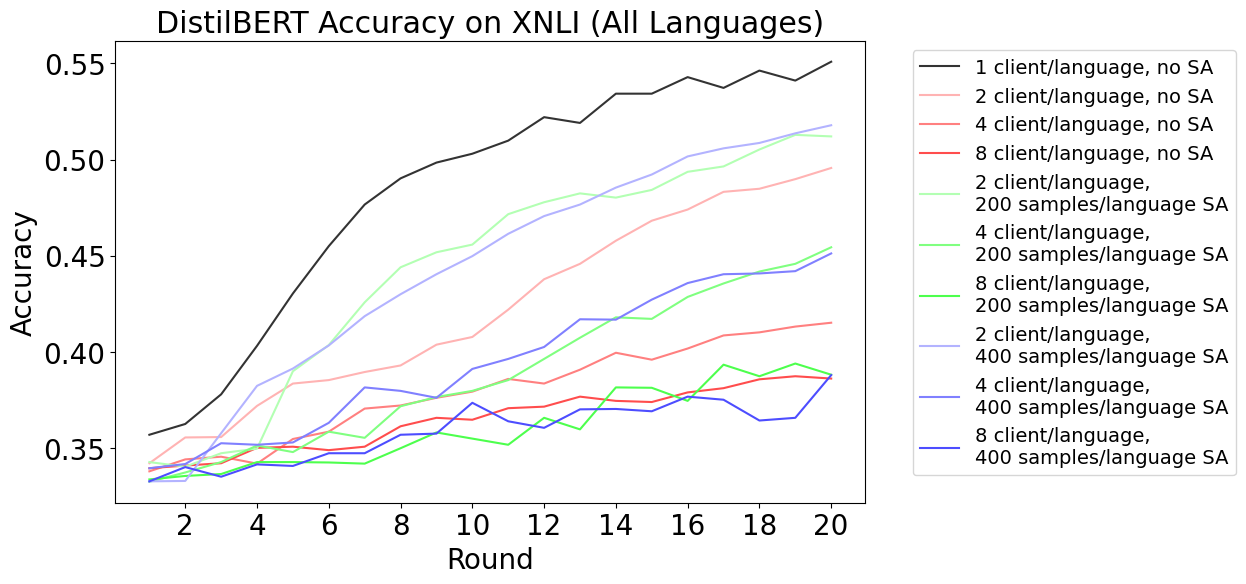

In [3]:
import os
import wandb
import matplotlib.pyplot as plt

def save_plot(config: dict):
    # Create the folder to save plots if it doesn't exist.
    os.makedirs(config["plot"]["save_folder"], exist_ok=True)

    # Initialize the wandb API.
    api = wandb.Api()

    # Create a figure and axis with a wider size.
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.rcParams.update({'font.size': config["plot"]["font_size"]})

    # We'll store all x-values here so we can determine min and max for integer ticks.
    all_x_values = []

    # Loop over the specified runs.
    for run_id, run_config in config["runs"].items():
        # Construct the full run path.
        run_path = f"{config['entity']}/{config['project']}/{run_id}"
        try:
            run = api.run(run_path)
        except Exception as e:
            print(f"Error fetching run {run_path}: {e}")
            continue

        # Fetch the run history for the desired metric.
        try:
            history = run.history(pandas=True)
        except Exception as e:
            print(f"Error fetching history for run {run_id}: {e}")
            continue

        # Check if the metric exists in the history.
        if config["plot"]["metric"] not in history.columns:
            print(history.columns)
            print(f"Metric '{config['plot']['metric']}' not found in run {run_id}.")
            continue

        # Use the 'round' column for the x-axis if available; otherwise, use the DataFrame index.
        if "round" in history.columns:
            x = history["round"]
        else:
            x = history.index

        y = history[config["plot"]["metric"]]

        # Filter out rows where the metric is NaN.
        valid = y.notna()
        x = x[valid]
        y = y[valid]

        # Store x-values for later setting integer ticks.
        all_x_values.extend(x.tolist())

        # Use the friendly label if provided, otherwise fall back to run_id.
        label = run_config.get("label", run_id)
        ax.plot(x, y, label=label, color=run_config["color"])

    # Labeling and layout adjustments.
    ax.set_xlabel("Round")
    ax.set_ylabel("Accuracy")

    # Set an optional plot title if provided in the config.
    plot_title = config["plot"].get("title", None)
    if plot_title:
        ax.set_title(plot_title)

    # Only use even integer ticks on the x-axis if we have valid x-values.
    if all_x_values:
        min_round = int(min(all_x_values))
        max_round = int(max(all_x_values))
        # Generate a list of even ticks from min_round to max_round.
        even_rounds = [r for r in range(min_round, max_round + 1) if r % 2 == 0 and r >= 2]
        ax.set_xticks(even_rounds)

    # Place the legend outside the main plot to avoid overlapping.
    legend_font_size = config["plot"].get("legend_font_size", 14)
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        prop={'size': legend_font_size},
        ncol=1,            # Two columns to condense the legend vertically
        labelspacing=0.5,  # Adjust vertical spacing between labels
        columnspacing=1.0  # Adjust horizontal spacing between legend columns
    )

    # Adjust subplot so the legend fits on the right.
    plt.subplots_adjust(right=0.75)

    # Save the plot to the specified folder.
    save_path = os.path.join(config["plot"]["save_folder"], f"{config['plot']['name']}.png")
    plt.savefig(save_path, dpi=config["plot"]["dpi"])
    print(f"Plot saved to: {save_path}")

    plt.show()

# Example configuration
d_full_config = {
    "entity": "exacle-",       # Replace with your wandb entity
    "project": "federated-xnli",  # Replace with your wandb project

    "runs": {
        "dizi72rl": {
            "color": "#333333",
            "label": "1 client/language, no SA"
        },
        "8if2ed30": {
            "color": "#FFB3B3",
            "label": "2 client/language, no SA"
        },
        "zx78d459": {
            "color": "#FF8080",
            "label": "4 client/language, no SA"
        },
        "5a4nkfkc": {
            "color": "#FF4D4D",
            "label": "8 client/language, no SA"
        },
        "y47dglua": {
            "color": "#B3FFB3",
            "label": "2 client/language, \n200 samples/language SA"
        },
        "o2phbapr": {
            "color": "#80FF80",
            "label": "4 client/language, \n200 samples/language SA"
        },
        "tbyu3zp7": {
            "color": "#4DFF4D",
            "label": "8 client/language, \n200 samples/language SA"
        },
        "m4g64zs1": {
            "color": "#B3B3FF",
            "label": "2 client/language, \n400 samples/language SA"
        },
        "k9l8dm3n": {
            "color": "#8080FF",
            "label": "4 client/language, \n400 samples/language SA"
        },
        "u2azwkdm": {
            "color": "#4D4DFF",
            "label": "8 client/language, \n400 samples/language SA"
        },
    },

    "plot": {
        "metric": "aggregated/eval_accuracy",
        "font_size": 18,           # Main text size
        "dpi": 300,                # High resolution
        "save_folder": "plots",    # Folder to save the plots
        "name": "d_full",          # File name for the plot
        "title": "DistilBERT Accuracy on XNLI (All Languages)",
        # "legend_title": "Run Variants",  # Removed to hide legend title
        "legend_font_size": 14,    # Slightly smaller legend font
    }
}

# Call the function to generate and save the plot
save_plot(d_full_config)


Plot saved to: plots/d_limited.png


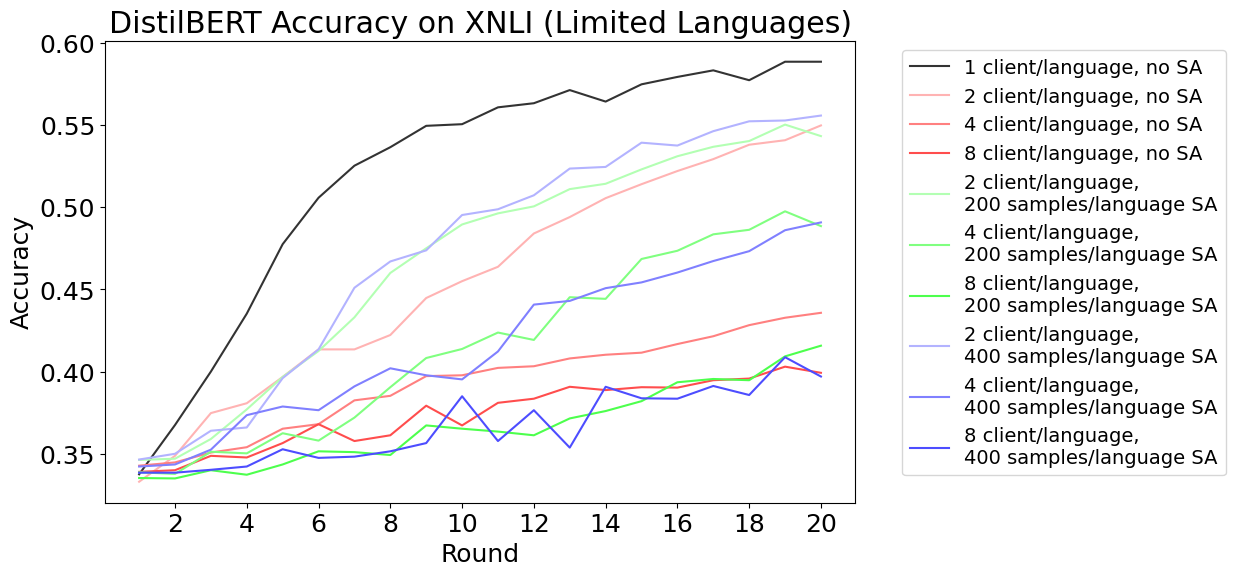

In [4]:
# Example configuration
d_limited_config = {
    "entity": "exacle-",       # Replace with your wandb entity
    "project": "federated-xnli",  # Replace with your wandb project

    "runs": {
        "h0fe9b94": {
            "color": "#333333",
            "label": "1 client/language, no SA"
        },
        "8uixhk3h": {
            "color": "#FFB3B3",
            "label": "2 client/language, no SA"
        },
        "adpgdka7": {
            "color": "#FF8080",
            "label": "4 client/language, no SA"
        },
        "zn3hroe7": {
            "color": "#FF4D4D",
            "label": "8 client/language, no SA"
        },
        "5q4l1svn": {
            "color": "#B3FFB3",
            "label": "2 client/language, \n200 samples/language SA"
        },
        "jyhlg0fh": {
            "color": "#80FF80",
            "label": "4 client/language, \n200 samples/language SA"
        },
        "9ic3vt56": {
            "color": "#4DFF4D",
            "label": "8 client/language, \n200 samples/language SA"
        },
        "6ow7x6fc": {
            "color": "#B3B3FF",
            "label": "2 client/language, \n400 samples/language SA"
        },
        "5aczdewu": {
            "color": "#8080FF",
            "label": "4 client/language, \n400 samples/language SA"
        },
        "kx4zo1pj": {
            "color": "#4D4DFF",
            "label": "8 client/language, \n400 samples/language SA"
        },
    },

    "plot": {
        "metric": "aggregated/eval_accuracy",
        "font_size": 18,           # Main text size
        "dpi": 300,                # High resolution
        "save_folder": "plots",    # Folder to save the plots
        "name": "d_limited",          # File name for the plot
        "title": "DistilBERT Accuracy on XNLI (Limited Languages)",
        # "legend_title": "Run Variants",  # Removed to hide legend title
        "legend_font_size": 14,    # Slightly smaller legend font
    }
}

# Call the function to generate and save the plot
save_plot(d_limited_config)

Plot saved to: plots/md_full.png


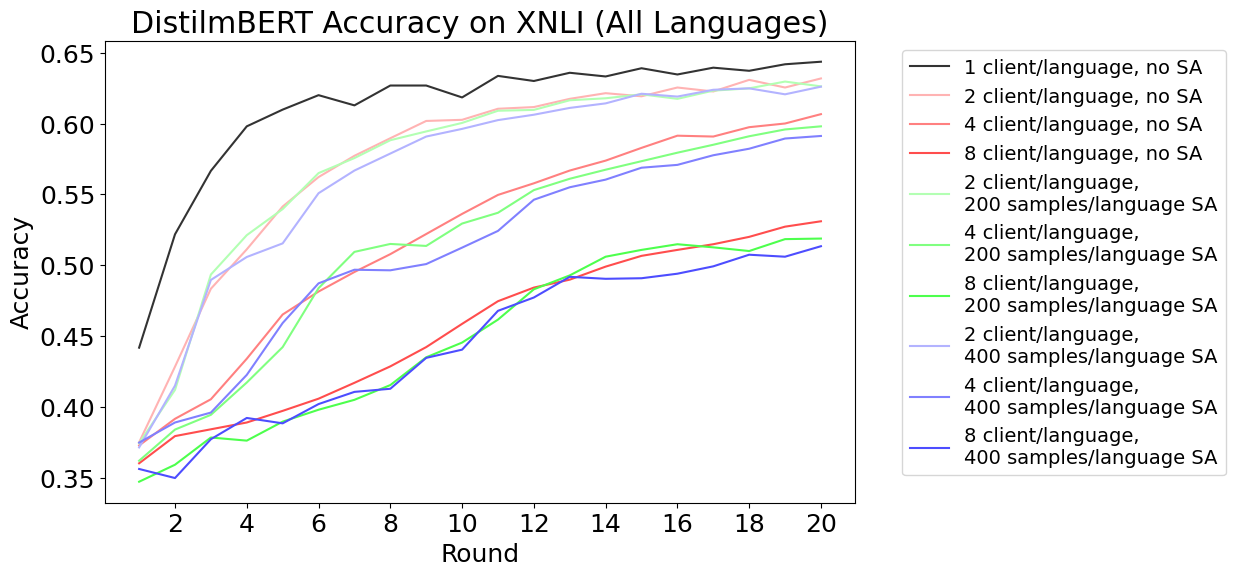

In [5]:
# Example configuration
md_full_config = {
    "entity": "exacle-",       # Replace with your wandb entity
    "project": "federated-xnli",  # Replace with your wandb project

    "runs": {
        "1te104tk": {
            "color": "#333333",
            "label": "1 client/language, no SA"
        },
        "frlxotb9": {
            "color": "#FFB3B3",
            "label": "2 client/language, no SA"
        },
        "5rrksdk3": {
            "color": "#FF8080",
            "label": "4 client/language, no SA"
        },
        "uxjlh8a0": {
            "color": "#FF4D4D",
            "label": "8 client/language, no SA"
        },
        "5u0145b5": {
            "color": "#B3FFB3",
            "label": "2 client/language, \n200 samples/language SA"
        },
        "6q2515bw": {
            "color": "#80FF80",
            "label": "4 client/language, \n200 samples/language SA"
        },
        "sngh8pcz": {
            "color": "#4DFF4D",
            "label": "8 client/language, \n200 samples/language SA"
        },
        "93pupyu3": {
            "color": "#B3B3FF",
            "label": "2 client/language, \n400 samples/language SA"
        },
        "84xzewa7": {
            "color": "#8080FF",
            "label": "4 client/language, \n400 samples/language SA"
        },
        "lko5ae8x": {
            "color": "#4D4DFF",
            "label": "8 client/language, \n400 samples/language SA"
        },
    },

    "plot": {
        "metric": "aggregated/eval_accuracy",
        "font_size": 18,           # Main text size
        "dpi": 300,                # High resolution
        "save_folder": "plots",    # Folder to save the plots
        "name": "md_full",          # File name for the plot
        "title": "DistilmBERT Accuracy on XNLI (All Languages)",
        # "legend_title": "Run Variants",  # Removed to hide legend title
        "legend_font_size": 14,    # Slightly smaller legend font
    }
}

# Call the function to generate and save the plot
save_plot(md_full_config)

Plot saved to: plots/md_limited.png


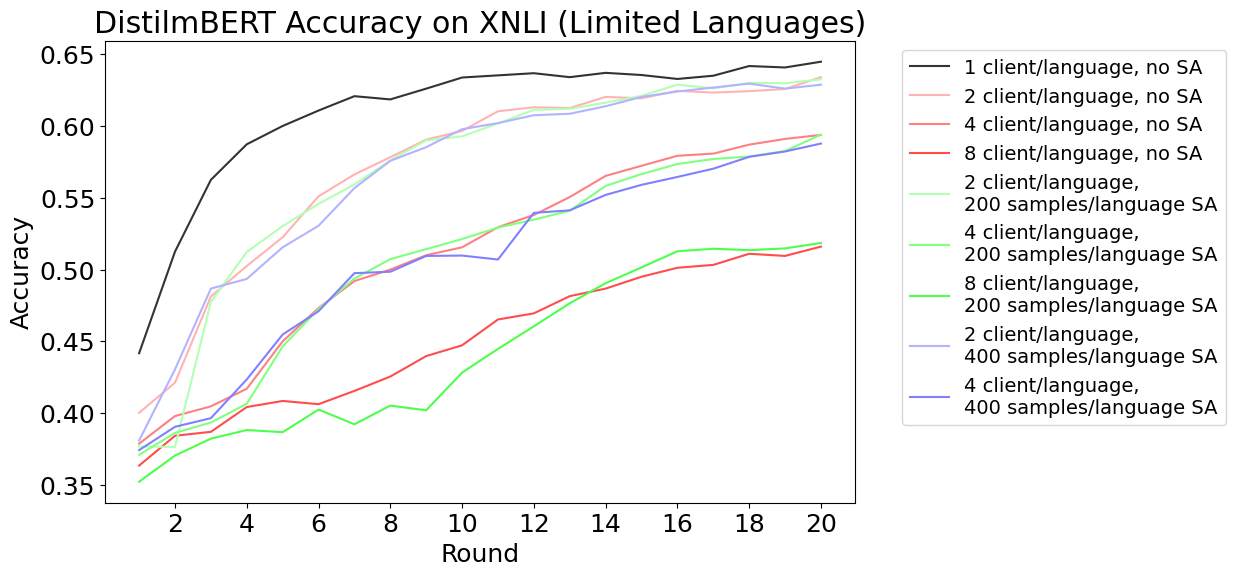

In [6]:
# Example configuration
md_limited_config = {
    "entity": "exacle-",       # Replace with your wandb entity
    "project": "federated-xnli",  # Replace with your wandb project

    "runs": {
        "o3o2fwci": {
            "color": "#333333",
            "label": "1 client/language, no SA"
        },
        "hbun7h27": {
            "color": "#FFB3B3",
            "label": "2 client/language, no SA"
        },
        "1zvfkhla": {
            "color": "#FF8080",
            "label": "4 client/language, no SA"
        },
        "3mh5phci": {
            "color": "#FF4D4D",
            "label": "8 client/language, no SA"
        },
        "xau53isf": {
            "color": "#B3FFB3",
            "label": "2 client/language, \n200 samples/language SA"
        },
        "h58vrzdb": {
            "color": "#80FF80",
            "label": "4 client/language, \n200 samples/language SA"
        },
        "9t270k1o": {
            "color": "#4DFF4D",
            "label": "8 client/language, \n200 samples/language SA"
        },
        "s917ou6s": {
            "color": "#B3B3FF",
            "label": "2 client/language, \n400 samples/language SA"
        },
        "crp8j70m": {
            "color": "#8080FF",
            "label": "4 client/language, \n400 samples/language SA"
        },
        # "kx4zo1pj": {
        #     "color": "#4D4DFF",
        #     "label": "8 client/language, \n400 samples/language SA"
        # },
    },

    "plot": {
        "metric": "aggregated/eval_accuracy",
        "font_size": 18,           # Main text size
        "dpi": 300,                # High resolution
        "save_folder": "plots",    # Folder to save the plots
        "name": "md_limited",          # File name for the plot
        "title": "DistilmBERT Accuracy on XNLI (Limited Languages)",
        # "legend_title": "Run Variants",  # Removed to hide legend title
        "legend_font_size": 14,    # Slightly smaller legend font
    }
}

# Call the function to generate and save the plot
save_plot(md_limited_config)

# Simplified Plots

In [7]:
import os
import wandb
import matplotlib.pyplot as plt

##############################################################################
# 1. DEFINE RUN IDS AND HELPER FUNCTIONS
##############################################################################

# This dictionary organizes your runs by model and semantic alignment (SA).
# Fill in each run ID corresponding to (model, SA, clients_per_language).
# For example, runs_config["d_full"]["no_sa"][1] = "xxxxxx" should be the
# W&B run ID for DistilBert Full, no SA, 1 client per language, etc.
runs_config = {
    "d_full": {
        "no_sa":   {1: "dizi72rl", 2: "8if2ed30", 4: "zx78d459", 8: "5a4nkfkc"},
        "200_sa":  {1: "9t59ca2h", 2: "y47dglua", 4: "o2phbapr", 8: "tbyu3zp7"},
        "400_sa":  {1: "ti0r8r8v", 2: "m4g64zs1", 4: "k9l8dm3n", 8: "u2azwkdm"},
    },
    "d_limited": {
        "no_sa":   {1: "h0fe9b94", 2: "8uixhk3h", 4: "adpgdka7", 8: "zn3hroe7"},
        "200_sa":  {1: "49gim0to", 2: "5q4l1svn", 4: "jyhlg0fh", 8: "9ic3vt56"},
        "400_sa":  {1: "2ppec49c", 2: "6ow7x6fc", 4: "5aczdewu", 8: "kx4zo1pj"},
    },
    "md_full": {
        "no_sa":   {1: "1te104tk", 2: "frlxotb9", 4: "5rrksdk3", 8: "uxjlh8a0"},
        "200_sa":  {1: "cbuqd89g", 2: "5u0145b5", 4: "6q2515bw", 8: "sngh8pcz"},
        "400_sa":  {1: "tt1hued8", 2: "93pupyu3", 4: "84xzewa7", 8: "lko5ae8x"},
    },
    "md_limited": {
        "no_sa":   {1: "o3o2fwci", 2: "hbun7h27", 4: "1zvfkhla", 8: "3mh5phci"},
        "200_sa":  {1: "wrmfqk9c", 2: "xau53isf", 4: "h58vrzdb", 8: "9t270k1o"},
        "400_sa":  {1: "48qfhmow", 2: "s917ou6s", 4: "crp8j70m", 8: "o9i905o7"},
    }
}

# Example: fill in actual run IDs for d_full / no_sa
# runs_config["d_full"]["no_sa"][1] = "dizi72rl"
# runs_config["d_full"]["no_sa"][2] = "8if2ed30"
# runs_config["d_full"]["no_sa"][4] = "zx78d459"
# runs_config["d_full"]["no_sa"][8] = "5a4nkfkc"
# runs_config["d_full"]["200_sa"][2] = "y47dglua"
# ... and so on for each scenario.

# Define a friendly display name for each model (for the legend/title in Plot #1).
model_labels = {
    "d_full": "distilbert (all)",
    "d_limited": "distilbert (european)",
    "md_full": "m-distilbert (all)",
    "md_limited": "m-distilbert (european)",
}

# Define a friendly label for each SA setting (for Plots #2–5).
sa_labels = {
    "no_sa": "No SA",
    "200_sa": "200 SA",
    "400_sa": "400 SA"
}

# Colors for the 4 models (Plot #1).
model_colors = {
    "d_full": "#FF8080",      # Pastel red
    "d_limited": "#80FF80",   # Pastel green
    "md_full": "#8080FF",     # Pastel blue
    "md_limited": "#FFD280",  # Pastel orange
}

# Colors for the 3 SA lines (Plots #2–5).
sa_colors = {
    "no_sa": "#333333",    # Dark gray
    "200_sa": "#80FF80",   # Pastel green
    "400_sa": "#8080FF",   # Pastel blue
}

# Your W&B credentials/config.
WANDB_ENTITY = "exacle-"        # Replace with your actual wandb entity
WANDB_PROJECT = "federated-xnli"  # Replace with your actual wandb project
METRIC_NAME = "test/accuracy"


def get_final_accuracy(run_id: str, entity: str, project: str, metric: str) -> float:
    """
    Fetches the run from W&B, returns the last valid value for the specified metric.
    Returns None if not found or on error.
    """
    if run_id is None:
        return None  # If we never set the run ID, skip it.

    try:
        api = wandb.Api()
        run_path = f"{entity}/{project}/{run_id}"
        run = api.run(run_path)
        history = run.history(pandas=True)

        if metric not in history.columns:
            return None

        # Drop NaNs, take the last value in the column.
        valid_values = history[metric].dropna()
        if len(valid_values) == 0:
            return None
        return valid_values.iloc[-1]
    except Exception as e:
        print(f"Error fetching final accuracy for run {run_id}: {e}")
        return None



Plot saved: plots/comparison_4models.png


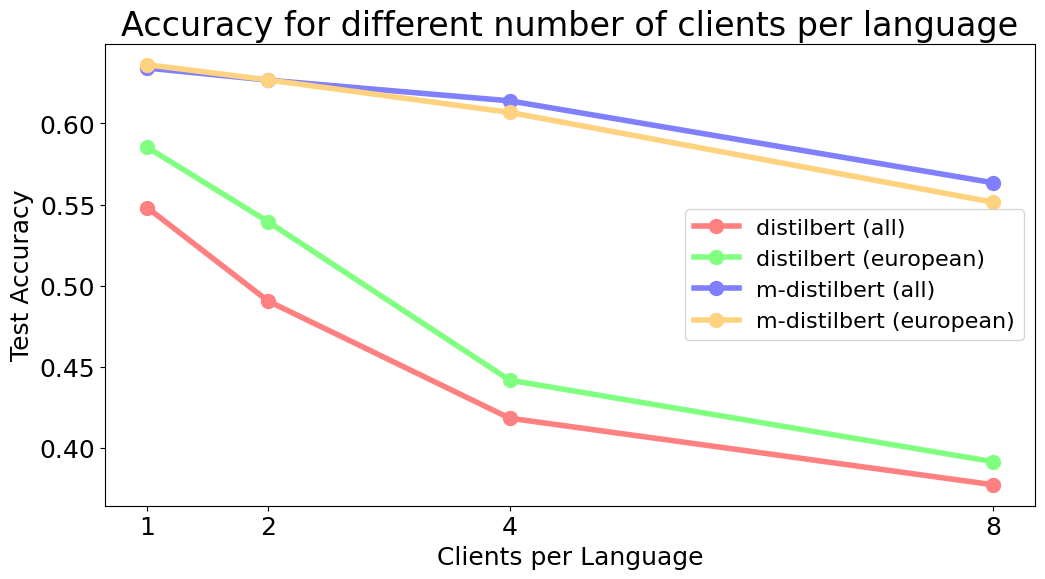

In [8]:
##############################################################################
# 2. PLOT #1: Four Models vs. Clients/Language (No SA)
##############################################################################

def plot_four_models_no_sa(
    runs: dict,
    save_name="comparison_4models.png",
    title="Final Accuracy (4 Models) vs. Clients/Language",
):
    """
    Creates a single plot with 4 lines (one per model) showing final accuracy
    at client counts [1, 2, 4, 8], using the "no_sa" runs from each model.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.rcParams.update({'font.size': 20})

    # Our x-values of interest
    client_counts = [1, 2, 4, 8]

    for model_key in ["d_full", "d_limited", "md_full", "md_limited"]:
        y_values = []
        for c in client_counts:
            run_id = runs[model_key]["no_sa"].get(c, None)
            final_acc = get_final_accuracy(run_id, WANDB_ENTITY, WANDB_PROJECT, METRIC_NAME)
            y_values.append(final_acc if final_acc is not None else 0.0)

        ax.plot(
            client_counts,
            y_values,
            label=model_labels[model_key],
            color=model_colors[model_key],
            marker="o",
            linewidth=4,
            markersize=10,
        )

    ax.set_xlabel("Clients per Language")
    ax.set_ylabel("Test Accuracy")
    ax.set_title(title)
    ax.set_xticks(client_counts)  # Ensure we show [1, 2, 4, 8]
    # Place legend to the right
    ax.legend(loc='best', prop={'size': 16})
    # plt.subplots_adjust(right=0.75)

    os.makedirs("plots", exist_ok=True)
    save_path = os.path.join("plots", save_name)
    plt.savefig(save_path, dpi=300)
    print(f"Plot saved: {save_path}")
    plt.show()
    

# PLOT #1: Compare 4 models, "no_sa" only
plot_four_models_no_sa(
    runs=runs_config,
    save_name="comparison_4models.png",
    title="Accuracy for different number of clients per language"
)

Plot saved: plots/d_full_sa.png


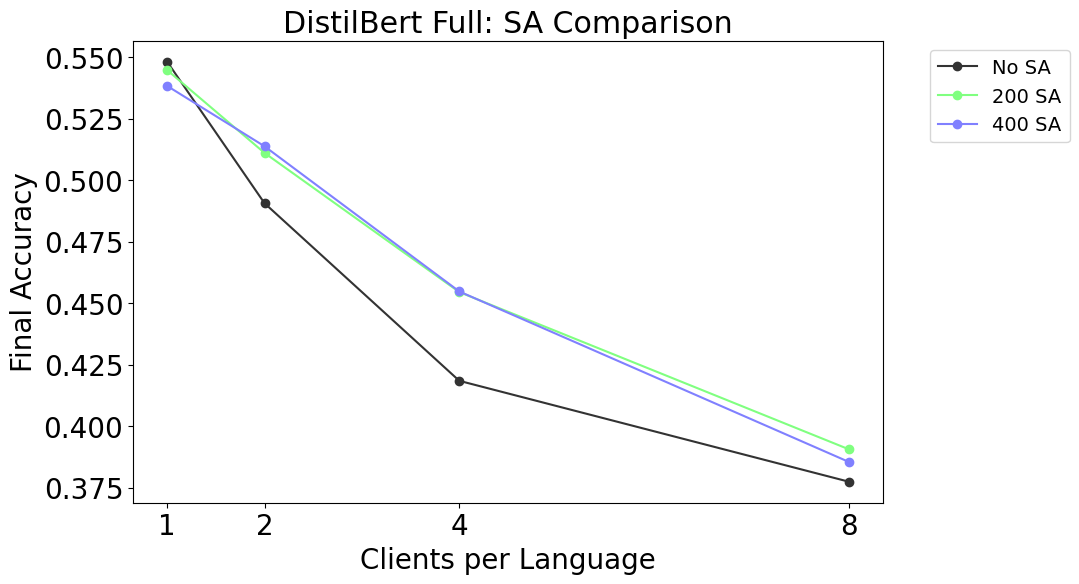

Plot saved: plots/d_limited_sa.png


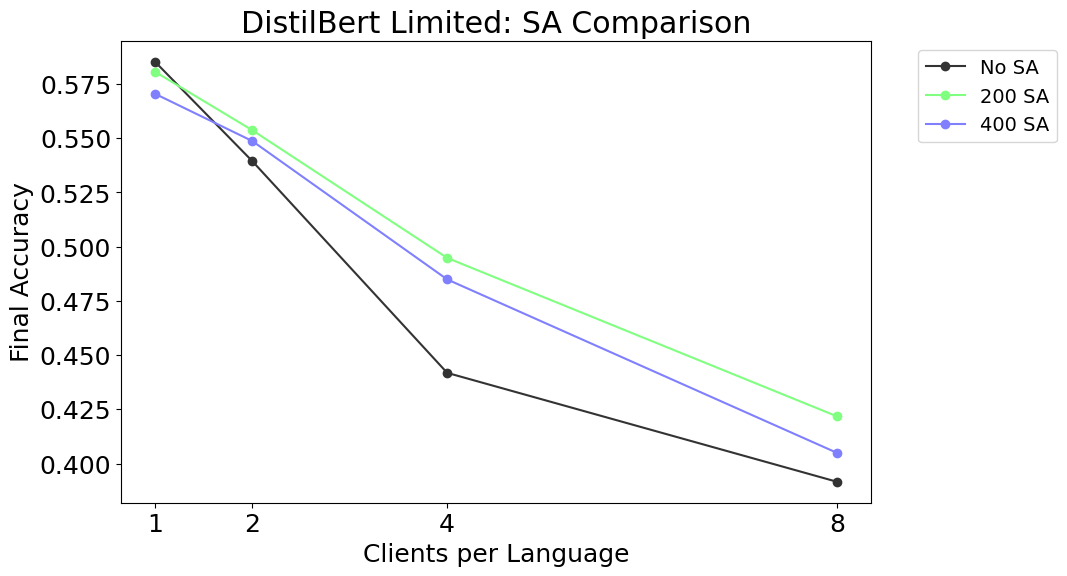

Plot saved: plots/md_full_sa.png


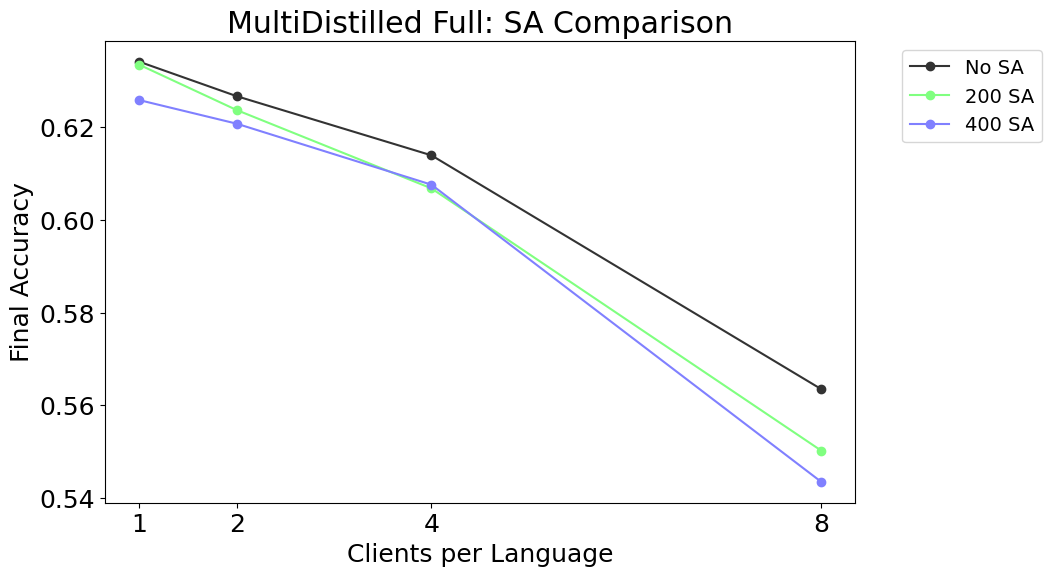

Plot saved: plots/md_limited_sa.png


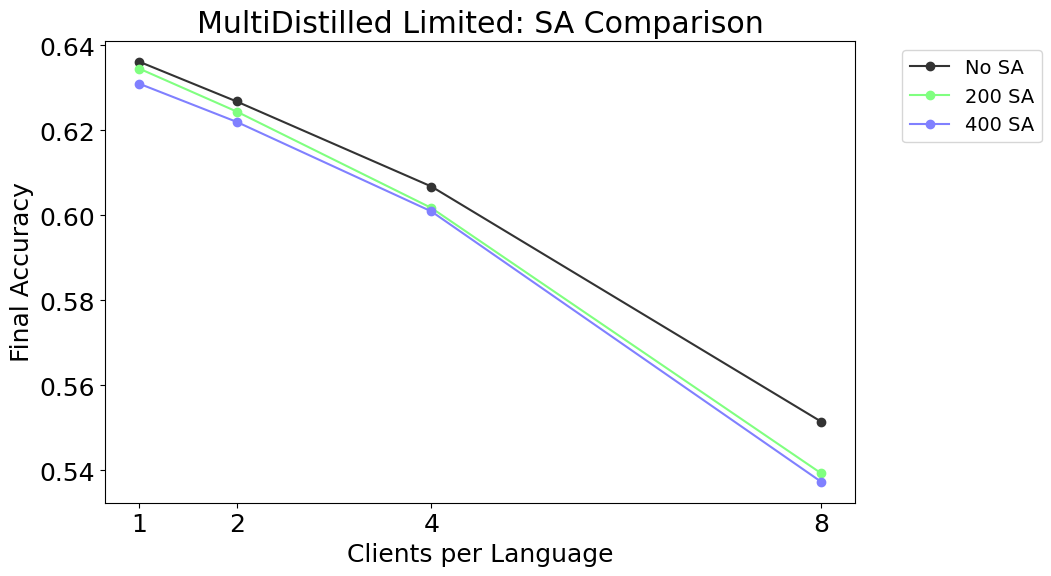

In [9]:
##############################################################################
# 3. PLOT #2–5: For Each Model, Compare 3 SA Settings
##############################################################################

def plot_model_sa(
    model_key: str,
    runs: dict,
    save_name: str,
    title: str,
):
    """
    For a single model (d_full, d_limited, md_full, or md_limited),
    plots up to 3 lines: "no_sa", "200_sa", "400_sa".
    X-axis is the number of clients per language for which that SA is available.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.rcParams.update({'font.size': 18})

    # We'll check each SA setting in the dictionary
    for sa_key in ["no_sa", "200_sa", "400_sa"]:
        # The sub-dict for that SA setting might not have all 4 client counts
        client_counts = sorted(runs[model_key][sa_key].keys())
        if not client_counts:
            continue  # skip if none

        y_values = []
        for c in client_counts:
            run_id = runs[model_key][sa_key][c]
            final_acc = get_final_accuracy(run_id, WANDB_ENTITY, WANDB_PROJECT, METRIC_NAME)
            y_values.append(final_acc if final_acc is not None else 0.0)

        ax.plot(
            client_counts,
            y_values,
            label=sa_labels[sa_key],
            color=sa_colors[sa_key],
            marker="o",
        )

    ax.set_xlabel("Clients per Language")
    ax.set_ylabel("Final Accuracy")
    ax.set_title(title)
    # Make sure to show integer ticks only (the set of client_counts used).
    all_counts = []
    for sa_key in ["no_sa", "200_sa", "400_sa"]:
        all_counts.extend(runs[model_key][sa_key].keys())
    unique_counts = sorted(set(all_counts))
    ax.set_xticks(unique_counts)

    # Legend on the right
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
    plt.subplots_adjust(right=0.75)

    os.makedirs("plots", exist_ok=True)
    save_path = os.path.join("plots", save_name)
    plt.savefig(save_path, dpi=300)
    print(f"Plot saved: {save_path}")
    plt.show()




# PLOT #2: DistilBert Full, compare SA
plot_model_sa(
    model_key="d_full",
    runs=runs_config,
    save_name="d_full_sa.png",
    title="DistilBert Full: SA Comparison"
)

# PLOT #3: DistilBert Limited, compare SA
plot_model_sa(
    model_key="d_limited",
    runs=runs_config,
    save_name="d_limited_sa.png",
    title="DistilBert Limited: SA Comparison"
)

# PLOT #4: MultiDistilled Full, compare SA
plot_model_sa(
    model_key="md_full",
    runs=runs_config,
    save_name="md_full_sa.png",
    title="MultiDistilled Full: SA Comparison"
)

# PLOT #5: MultiDistilled Limited, compare SA
plot_model_sa(
    model_key="md_limited",
    runs=runs_config,
    save_name="md_limited_sa.png",
    title="MultiDistilled Limited: SA Comparison"
)

Combined plot saved: plots/combined_d_sa.png


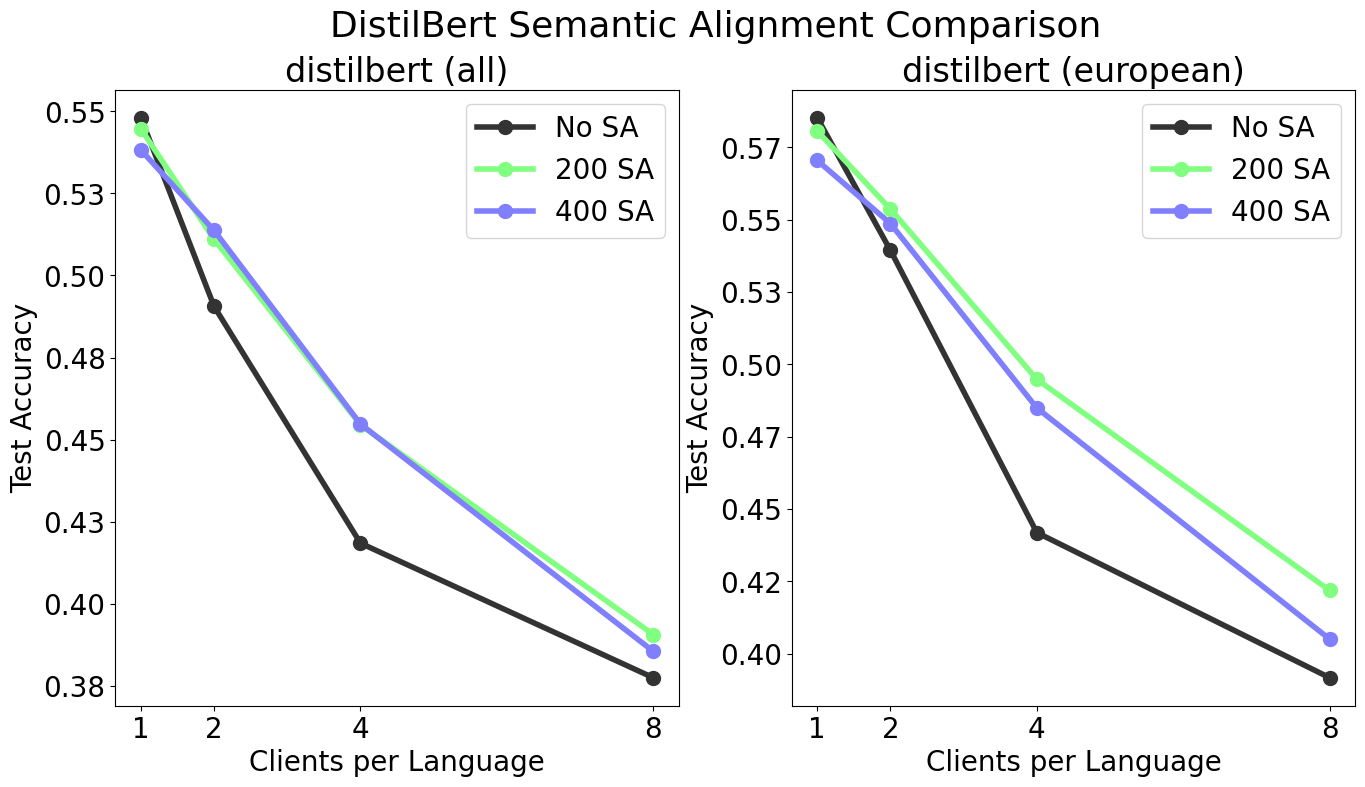

Combined plot saved: plots/combined_md_sa.png


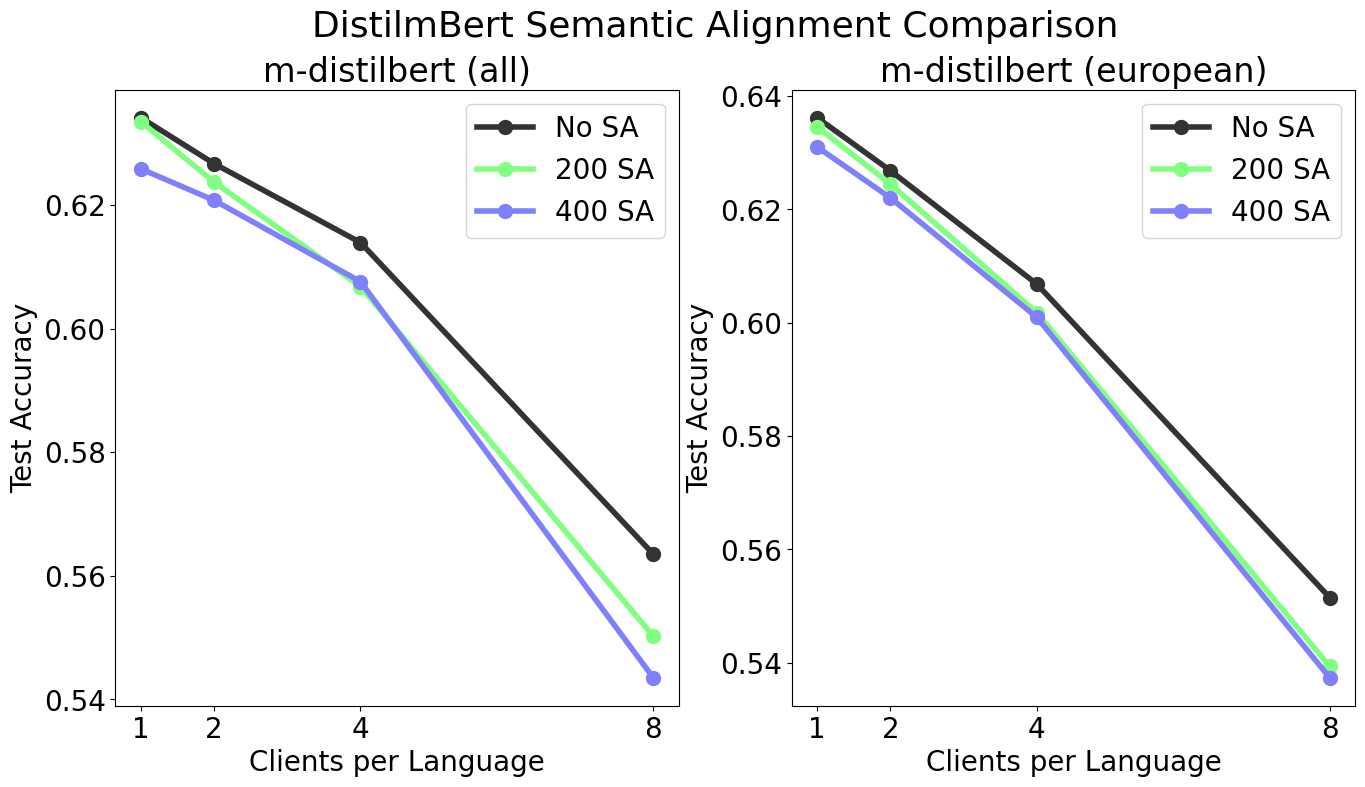

In [10]:
import os
import wandb
import matplotlib.pyplot as plt

def plot_combined_sa(models, runs, group_title, save_name):
    """
    Creates a combined figure with side-by-side subplots for a list of model keys.
    Each subplot shows the SA comparison lines ("no_sa", "200_sa", "400_sa") 
    for that model.
    """
    # Set overall font size to 20
    plt.rcParams.update({'font.size': 20})
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(8 * num_models, 8))
    if num_models == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, model_key in zip(axes, models):
        # For each SA setting, plot the final accuracy vs. clients per language
        for sa_key in ["no_sa", "200_sa", "400_sa"]:
            # Get the client counts available for this SA setting
            client_counts = sorted(runs[model_key][sa_key].keys())
            if not client_counts:
                continue
            y_values = []
            for c in client_counts:
                run_id = runs[model_key][sa_key][c]
                final_acc = get_final_accuracy(run_id, WANDB_ENTITY, WANDB_PROJECT, METRIC_NAME)
                y_values.append(final_acc if final_acc is not None else 0.0)
            ax.plot(client_counts, y_values,
                    label=sa_labels[sa_key],
                    color=sa_colors[sa_key],
                    marker="o", linewidth=4, markersize=10)
        
        ax.set_xlabel("Clients per Language")
        ax.set_ylabel("Test Accuracy")
        ax.set_title(model_labels[model_key])
        # Set x-ticks to the unique available client counts
        all_counts = []
        for sa_key in ["no_sa", "200_sa", "400_sa"]:
            all_counts.extend(runs[model_key][sa_key].keys())
        unique_counts = sorted(set(all_counts))
        ax.set_xticks(unique_counts)
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        # Place legend inside at the best location
        ax.legend(loc='best', prop={'size': 20})

    # Reduce the gap between the suptitle and subplots by lowering the y parameter.
    fig.suptitle(group_title, fontsize=26)
    # Adjust the layout so subplots use more vertical space
    # fig.tight_layout(rect=[0, 0, 1, 0.90])
    os.makedirs("plots", exist_ok=True)
    save_path = os.path.join("plots", save_name)
    plt.savefig(save_path, dpi=300)
    print(f"Combined plot saved: {save_path}")
    plt.show()


# Combined plot for DistilBert variants: d_full and d_limited
plot_combined_sa(
    models=["d_full", "d_limited"],
    runs=runs_config,
    group_title="DistilBert Semantic Alignment Comparison",
    save_name="combined_d_sa.png"
)

# Combined plot for MultiDistilBert variants: md_full and md_limited
plot_combined_sa(
    models=["md_full", "md_limited"],
    runs=runs_config,
    group_title="DistilmBert Semantic Alignment Comparison",
    save_name="combined_md_sa.png"
)


# Other Plots 

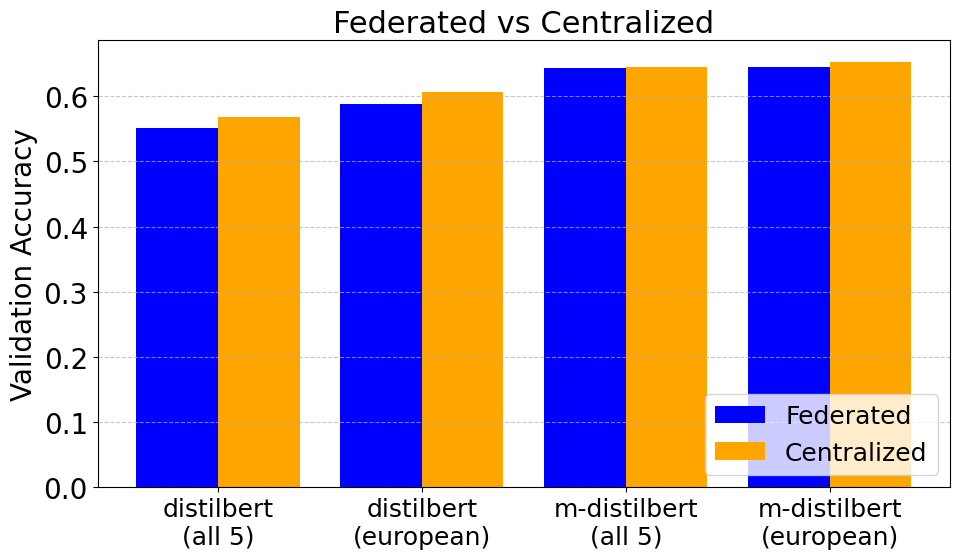

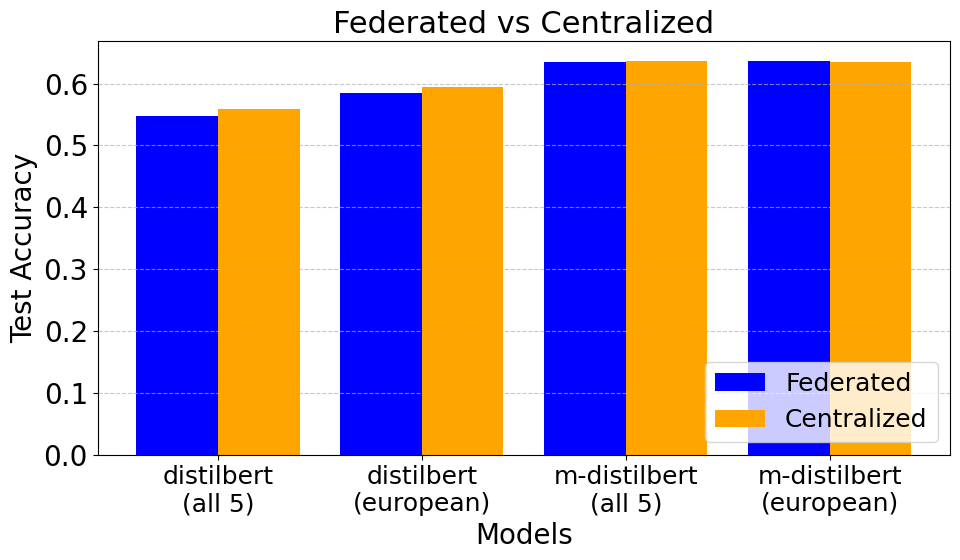

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data from tables
models = ['distilbert\n(all 5)', 'distilbert\n(european)', 'm-distilbert\n(all 5)', 'm-distilbert\n(european)']
val_acc_federated = [0.5508, 0.5885, 0.6436, 0.6448]
test_acc_federated = [0.5481, 0.5853, 0.6341, 0.6362]
val_acc_centralized = [0.568, 0.607, 0.645, 0.6528]
test_acc_centralized = [0.5592, 0.5944, 0.6364, 0.6344]

x = np.arange(len(models))
width = 0.4  # Width of bars

# Save directory
save_dir = "plots/"

# Plot Validation Accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, val_acc_federated, width, label='Federated', color='blue')
ax.bar(x + width/2, val_acc_centralized, width, label='Centralized', color='orange')

# ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Validation Accuracy', fontsize=20)
ax.set_title('Federated vs Centralized', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=18)
ax.legend(fontsize=18, loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(save_dir + "validation_accuracy_comparison.png", dpi=300)
plt.show()

# Plot Test Accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, test_acc_federated, width, label='Federated', color='blue')
ax.bar(x + width/2, test_acc_centralized, width, label='Centralized', color='orange')

ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Test Accuracy', fontsize=20)
ax.set_title('Federated vs Centralized', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=18)
ax.legend(fontsize=18, loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(save_dir + "test_accuracy_comparison.png", dpi=300)
plt.show()


Combined plot saved: plots/combined_d_epochs.png


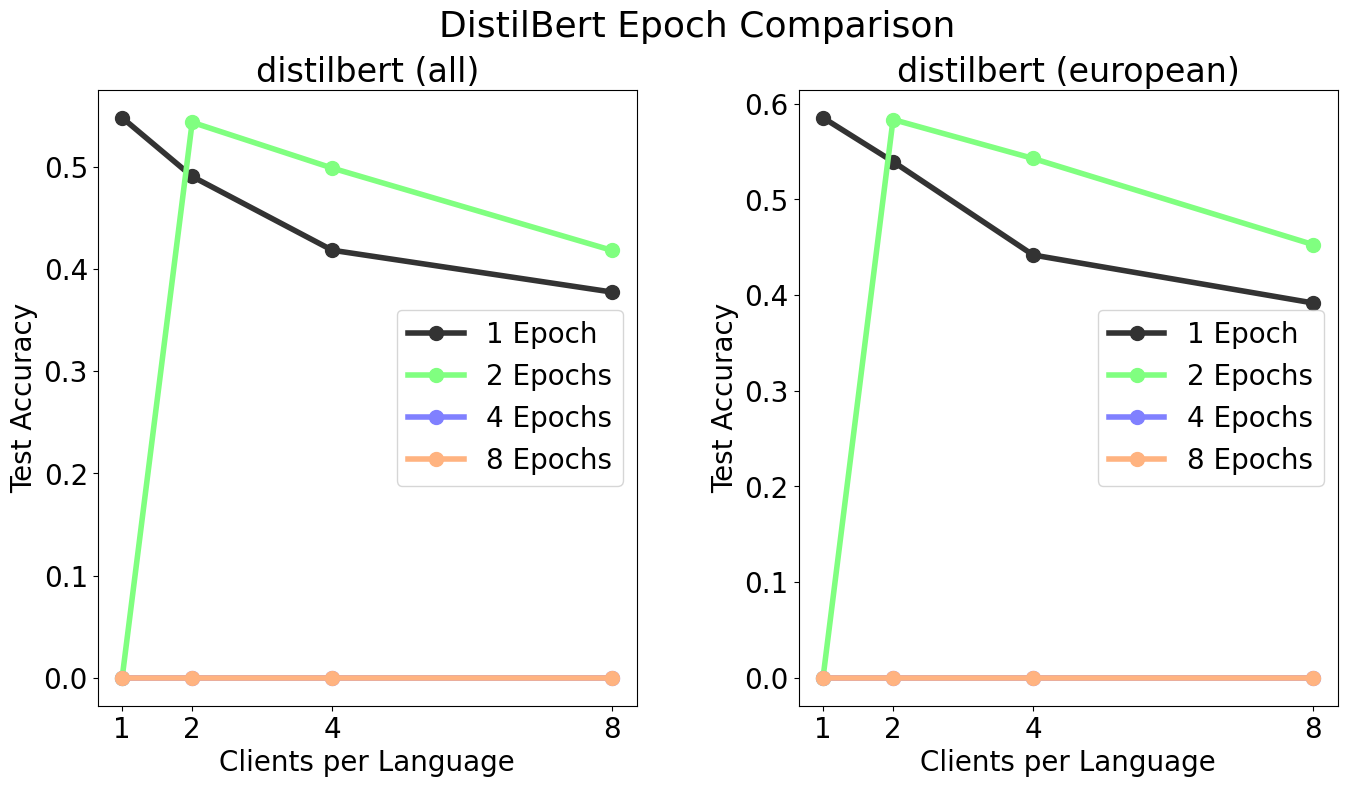

Combined plot saved: plots/combined_md_epochs.png


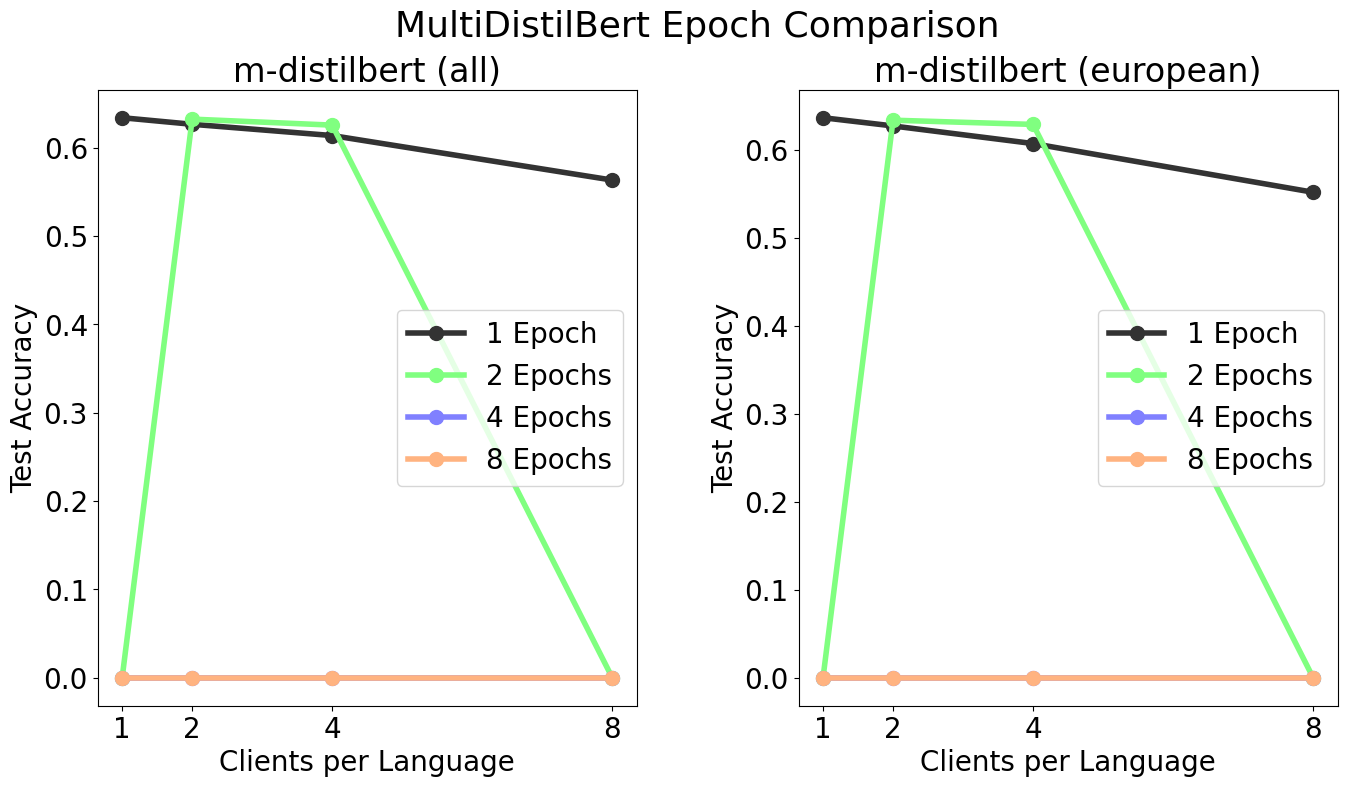

In [13]:
runs_config_epochs = {
    "d_full": {
        "1_epoch":   {1: "dizi72rl", 2: "8if2ed30", 4: "zx78d459", 8: "5a4nkfkc"},
        "2_epochs":  {1: None, 2: "8owzvt4a", 4: "ksodq0mv", 8: "luevhuf8"},
        "4_epochs":  {1: None, 2: None, 4: None, 8: None},
        "8_epochs":  {1: None, 2: None, 4: None, 8: None},
    },
    "d_limited": {
        "1_epoch":   {1: "h0fe9b94", 2: "8uixhk3h", 4: "adpgdka7", 8: "zn3hroe7"},
        "2_epochs":  {1: None, 2: "ezj8b4d3", 4: "meegpgq2", 8: "36ampsy0"},
        "4_epochs":  {1: None, 2: None, 4: None, 8: None},
        "8_epochs":  {1: None, 2: None, 4: None, 8: None},
    },
    "md_full": {
        "1_epoch":   {1: "1te104tk", 2: "frlxotb9", 4: "5rrksdk3", 8: "uxjlh8a0"},
        "2_epochs":  {1: None, 2: "6xirmo6k", 4: "vyhd1o4o", 8: None},
        "4_epochs":  {1: None, 2: None, 4: None, 8: None},
        "8_epochs":  {1: None, 2: None, 4: None, 8: None},
    },
    "md_limited": {
        "1_epoch":   {1: "o3o2fwci", 2: "hbun7h27", 4: "1zvfkhla", 8: "3mh5phci"},
        "2_epochs":  {1: None, 2: "xmfnqd6p", 4: "j3h35vxc", 8: None},
        "4_epochs":  {1: None, 2: None, 4: None, 8: None},
        "8_epochs":  {1: None, 2: None, 4: None, 8: None},
    }
}


epoch_labels = {
    "1_epoch":  "1 Epoch",
    "2_epochs": "2 Epochs",
    "4_epochs": "4 Epochs",
    "8_epochs": "8 Epochs",
}

epoch_colors = {
    "1_epoch":  "#333333",  # Dark gray
    "2_epochs": "#80FF80",  # Pastel green
    "4_epochs": "#8080FF",  # Pastel blue
    "8_epochs": "#FFB380",  # Pastel orange
}


import os
import wandb
import matplotlib.pyplot as plt

def plot_combined_epochs(models, runs, group_title, save_name):
    """
    Creates a combined figure with side-by-side subplots for the given model keys.
    Each subplot shows lines for different epoch counts ("1_epoch", "2_epochs", etc.).
    The x-axis is the number of clients per language (1, 2, 4, 8).
    """
    plt.rcParams.update({'font.size': 20})
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(8 * num_models, 8))
    if num_models == 1:
        axes = [axes]  # Make sure axes is iterable if there's only one model

    for ax, model_key in zip(axes, models):
        # For each epoch setting, plot the final accuracy vs. clients per language
        for epoch_key in ["1_epoch", "2_epochs", "4_epochs", "8_epochs"]:
            # Check if this model has an entry for that epoch key
            if epoch_key not in runs[model_key]:
                continue

            # Get the client counts available for this epoch setting
            client_counts = sorted(runs[model_key][epoch_key].keys())
            if not client_counts:
                continue

            y_values = []
            for c in client_counts:
                run_id = runs[model_key][epoch_key][c]
                final_acc = get_final_accuracy(run_id, WANDB_ENTITY, WANDB_PROJECT, METRIC_NAME)
                y_values.append(final_acc if final_acc is not None else 0.0)

            ax.plot(
                client_counts,
                y_values,
                label=epoch_labels[epoch_key],
                color=epoch_colors[epoch_key],
                marker="o", linewidth=4, markersize=10
            )

        ax.set_xlabel("Clients per Language")
        ax.set_ylabel("Test Accuracy")
        ax.set_title(model_labels[model_key])

        # Ensure the x-axis shows all client counts found in the sub-dict
        all_counts = []
        for ep_k in ["1_epoch", "2_epochs", "4_epochs", "8_epochs"]:
            if ep_k in runs[model_key]:
                all_counts.extend(runs[model_key][ep_k].keys())
        unique_counts = sorted(set(all_counts))
        ax.set_xticks(unique_counts)

        # Place legend inside at the best location
        ax.legend(loc='best', prop={'size': 20})

    fig.suptitle(group_title, fontsize=26)
    plt.subplots_adjust(wspace=0.3)  # Adjust horizontal space to avoid overlap

    os.makedirs("plots", exist_ok=True)
    save_path = os.path.join("plots", save_name)
    plt.savefig(save_path, dpi=300)
    print(f"Combined plot saved: {save_path}")
    plt.show()


# Combined plot for DistilBert variants
plot_combined_epochs(
    models=["d_full", "d_limited"],
    runs=runs_config_epochs,  # dictionary with run IDs for each epoch
    group_title="DistilBert Epoch Comparison",
    save_name="combined_d_epochs.png"
)

# Combined plot for MultiDistilBert variants
plot_combined_epochs(
    models=["md_full", "md_limited"],
    runs=runs_config_epochs,
    group_title="MultiDistilBert Epoch Comparison",
    save_name="combined_md_epochs.png"
)
